### importing the liberies

In [124]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [125]:
data=pd.read_csv('insurance.csv')

In [126]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [127]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [128]:
data.shape

(1338, 7)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [130]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Checking for null values

In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
import seaborn as sns

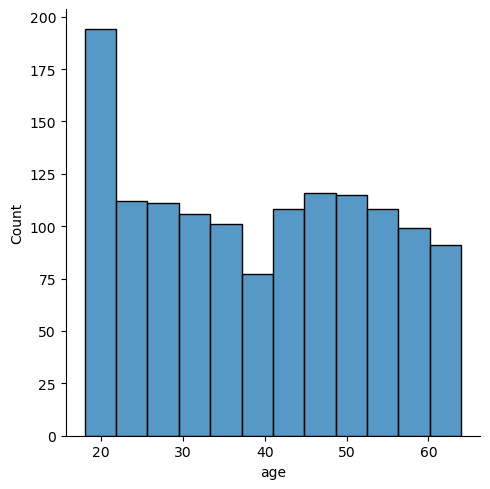

In [20]:
sns.displot(data['age'])

<Axes: >

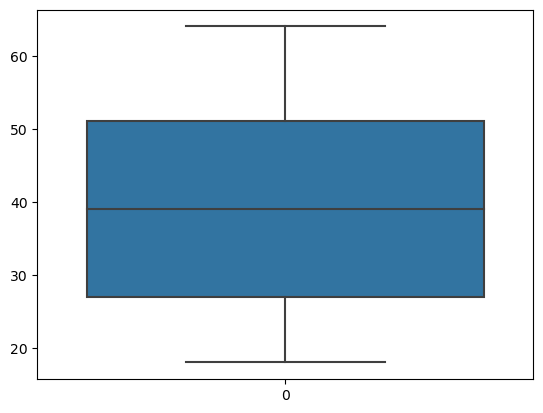

In [24]:
sns.boxplot(data['age'])

##### as you can see there is no outliers even those i am checking 

In [25]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

In [28]:
data = handle_outliers(data, 'age')

In [29]:
print(df['age'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


<Axes: >

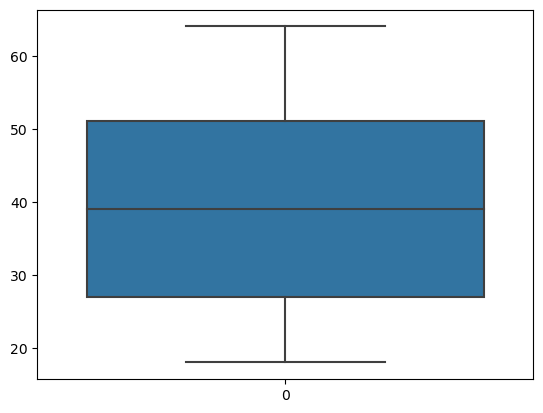

In [30]:
sns.boxplot(data['age'])

#### label Encodeing the categorical values

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le=LabelEncoder()

In [34]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


In [106]:
x=data.drop('charges',axis=1)
y=data["charges"]

In [107]:
x

,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1
1334,18.0,0,31.920,0,0,0
1335,18.0,0,36.850,0,0,2
1336,21.0,0,25.800,0,0,3


In [108]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### spliting the data

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=44)

### Building the model 

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression()

In [113]:
model.fit(xtrain,ytrain)

LinearRegression()

In [114]:
y_pred=model.predict(xtest)

In [117]:
r2 = r2_score(ytest, y_pred)
print(f"R² score: {r2:.4f}")

R² score: 0.7541


In [118]:
x_pred=[[19.0,1,44.32,3,0,1]]

In [119]:
print(model.predict(x_pred))

[8973.58092979]
